# Tabular Data Exploration and Preprocessing

"As evidence shows, most data scientists spend most of their time — up to 70% — on cleaning data." - KDnuggets survey

In this tutorial, we will go through example code for data preprocessing helping you to complete the first assignments and the ones after that focused on tabular data.  

You can open the Table of Content tab on the left through the first button under the colab Logo on the left. It is easier to navigate the notebook with that tab open. 

reference: https://www.kdnuggets.com/2019/11/data-cleaning-preprocessing-beginners.html


## Data Loading and Exploration

First, let's load a simple dataframe. 

In [1]:
import pandas as pd
df = pd.read_csv("https://github.com/CISC-372/Notebook/releases/download/others/movies.csv")
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,$41.94,2008.0
1,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,$19.62,2010.0
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,$26.66,2010.0
3,When in Rome,Comedy,Disney,44.0,0.000000,15.0,$43.04,2010.0
4,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,$219.37,2008.0
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84.0,0.652603,54.0,$29.37,2007.0
73,A Serious Man,Drama,Universal,64.0,NaN,89.0,$30.68,2009.0
74,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,$8.97,2011.0
75,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,$160.31,2008.0


In [2]:
## as you can see, the Worldwide Gross column comes with dollar sign, let's remove it
df['Worldwide Gross'] = df['Worldwide Gross'].str.replace('$', '').astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,41.94,2008.0
1,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.62,2010.0
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.66,2010.0
3,When in Rome,Comedy,Disney,44.0,0.000000,15.0,43.04,2010.0
4,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.37,2008.0
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84.0,0.652603,54.0,29.37,2007.0
73,A Serious Man,Drama,Universal,64.0,NaN,89.0,30.68,2009.0
74,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.97,2011.0
75,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.31,2008.0


### Visualizing numeric values

In [3]:
### select numeric columns
import numpy as np
df_numeric = df.select_dtypes(include=np.number)
df_numeric.columns

# to select categorical columns you can use the following line:
# df.select_dtypes(include =['object'])

Index(['Audience score %', 'Profitability', 'Rotten Tomatoes %',
       'Worldwide Gross', 'Year'],
      dtype='object')

In [4]:
import plotly.express as px
fig = px.imshow(df_numeric.corr())
fig.show()

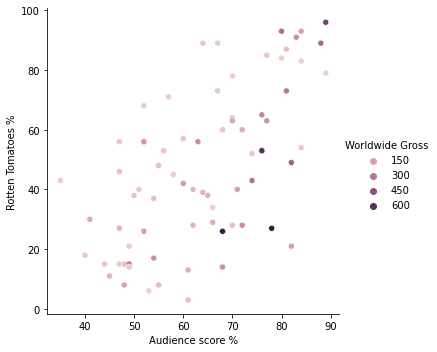

In [5]:
# visualizing relationship between two different movie review score agains worldwide gross  
import seaborn as sns
sns.relplot(x="Audience score %", y="Rotten Tomatoes %", hue="Worldwide Gross", data=df);

### Visualizing categorical values

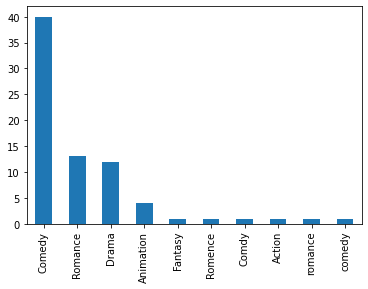

In [6]:
# Year distribution?

df["Genre"].value_counts().plot(kind='bar')

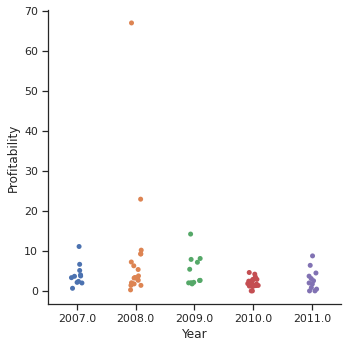

In [7]:
# Profitability w.r.t Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Year", y="Profitability", data=df)

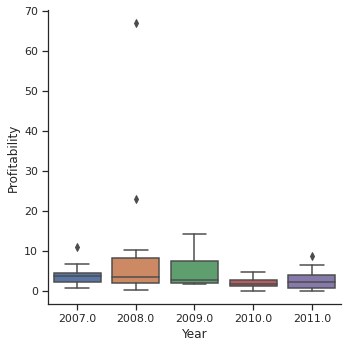

In [8]:
# Profitability distribution w.r.t Year with  kind="box"
sns.catplot(x="Year", y="Profitability", kind="box",  data=df)

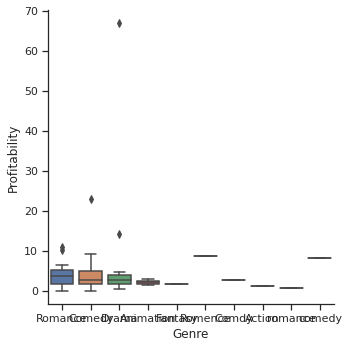

In [9]:
# Profitability distribution w.r.t Genre with  kind="swarm"
sns.catplot(x="Genre", y="Profitability", kind="box",  data=df)

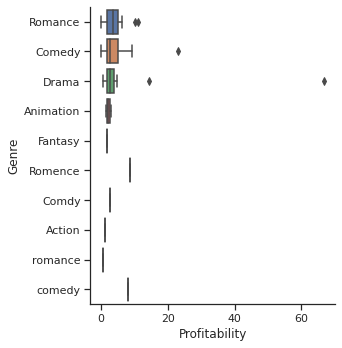

In [10]:
# as you can see from the previous plot, Genre has too many values.
# it is better to put it in the y axis (alternatively you can rotate the genre 
# label by 90 degree)
sns.catplot(y="Genre", x="Profitability", kind="box",  data=df)

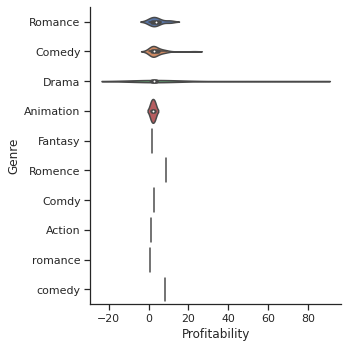

In [11]:
sns.catplot(x="Profitability", y="Genre",
            kind="violin", data=df)

## Missing values handling

We have learned how to handle missing values in pandas. 
Here we focus on using sklearn package.

#### Understanding what is missing

In [12]:
# First, lets drop duplicates (if any)
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,74.000000,72.000000,74.000000,74.000000,74.000000
mean,63.486486,4.549505,45.972973,139.205676,2009.081081
std,13.641439,8.285640,26.202569,157.891677,1.352388
min,35.000000,0.000000,3.000000,0.030000,2007.000000
25%,52.000000,1.740535,26.000000,32.447500,2008.000000
50%,63.500000,2.618769,43.000000,74.245000,2009.000000
75%,74.000000,4.503606,63.750000,202.467500,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [14]:
# missing values per-column 
total = df.isnull().sum().sort_values(ascending=False)
total

Profitability        3
Genre                2
Lead Studio          2
Audience score %     1
Rotten Tomatoes %    1
Worldwide Gross      1
Year                 1
Film                 0
dtype: int64

In [15]:
# missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

Profitability        0.040000
Genre                0.026667
Lead Studio          0.026667
Audience score %     0.013333
Rotten Tomatoes %    0.013333
Worldwide Gross      0.013333
Year                 0.013333
Film                 0.000000
dtype: float64

,Total,Percent
Profitability,3,0.040000
Genre,2,0.026667
Lead Studio,2,0.026667
Audience score %,1,0.013333
Rotten Tomatoes %,1,0.013333
Worldwide Gross,1,0.013333
Year,1,0.013333
Film,0,0.000000


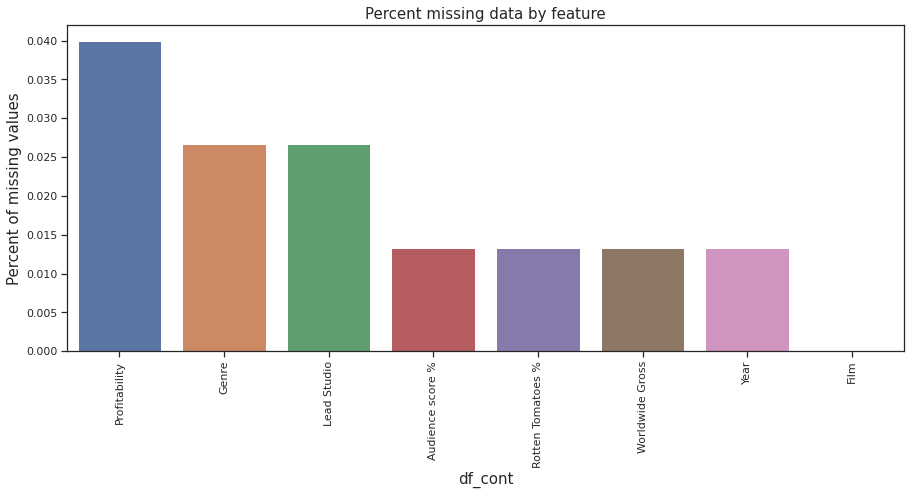

In [16]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [17]:
# Before we start preprocessing, we need train/test split:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=.3)
len(df_train), len(df_test)

(52, 23)

### Univariate feature imputation
Replace missing values with constant value

#### Numeric data

In [18]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

# transform training numbers
train_numeric_features = imp.fit_transform(
    df_train.select_dtypes(include=np.number))


test_numeric_features = imp.transform(
    df_test.select_dtypes(include=np.number))

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_numeric_features, 
    columns=df_test.select_dtypes(include=np.number).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

In [19]:
import numpy as np
from sklearn.impute import SimpleImputer

# we use mean strategy - you can also use median or most_frequent
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# estimate mean value from training setn and transform training numbers
train_numeric_features = imp.fit_transform(
    df_train.select_dtypes(include=np.number))


test_numeric_features = imp.transform(
    df_test.select_dtypes(include=np.number))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_numeric_features, 
    columns=df_test.select_dtypes(include=np.number).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

#### Categorical data

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace with constant
imp = SimpleImputer(strategy='constant', fill_value='hahaha')

# here select only categorical features
train_categorical_features = imp.fit_transform(
    df_train.select_dtypes(include =['object']))


test_categorical_features = imp.transform(
    df_test.select_dtypes(include =['object']))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_categorical_features, 
    columns=df_test.select_dtypes(include =['object']).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

Film           0
Genre          0
Lead Studio    0
dtype: int64

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace with most_frequent from training set
imp = SimpleImputer(strategy='most_frequent')

# here select only categorical features
train_categorical_features = imp.fit_transform(
    df_train.select_dtypes(include =['object']))


test_categorical_features = imp.transform(
    df_test.select_dtypes(include =['object']))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_categorical_features, 
    columns=df_test.select_dtypes(include =['object']).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

Film           0
Genre          0
Lead Studio    0
dtype: int64

### Multivariate feature imputation

In [22]:
## first, we have to convert all categorical to numeric:

# make a copy
df_converted = df.copy()

for col_name in df_converted.columns:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name] = df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes


In [23]:
# Before we start preprocessing, we need train/test split:
from sklearn.model_selection import train_test_split

df_converted_train, df_converted_test = train_test_split(
    df_converted, test_size=.3)
len(df_converted_train), len(df_converted_test)

df_converted_test.info()
# as you can see below in non-null count
# there is 1 missing value for Profitability in 
# the testing set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 6 to 58
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               23 non-null     int8   
 1   Genre              23 non-null     int8   
 2   Lead Studio        23 non-null     int8   
 3   Audience score %   23 non-null     float64
 4   Profitability      21 non-null     float64
 5   Rotten Tomatoes %  22 non-null     float64
 6   Worldwide Gross    23 non-null     float64
 7   Year               22 non-null     float64
dtypes: float64(5), int8(3)
memory usage: 1.1 KB


In [24]:
import numpy as np

# use KNN model to predict missing value (works for both numeric & categorical)
from sklearn.impute import KNNImputer

# replace with constant
imputer = KNNImputer(n_neighbors=10) 


# here select only categorical features
train_features = imputer.fit_transform(
    df_converted_train)


test_features = imputer.transform(
    df_converted_test)

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_features, 
    columns=df_converted_test.columns
    )

cleaned_test.info()
# now the missing value is replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               23 non-null     float64
 1   Genre              23 non-null     float64
 2   Lead Studio        23 non-null     float64
 3   Audience score %   23 non-null     float64
 4   Profitability      23 non-null     float64
 5   Rotten Tomatoes %  23 non-null     float64
 6   Worldwide Gross    23 non-null     float64
 7   Year               23 non-null     float64
dtypes: float64(8)
memory usage: 1.6 KB


In [25]:
import numpy as np

# IterativeImputer: missing value is a function of the other values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)


# here select only categorical features
train_features = imputer.fit_transform(
    df_converted_train)


test_features = imputer.transform(
    df_converted_test)

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_features, 
    columns=df_converted_test.columns
    )

cleaned_test.info()
# now the missing value is replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               23 non-null     float64
 1   Genre              23 non-null     float64
 2   Lead Studio        23 non-null     float64
 3   Audience score %   23 non-null     float64
 4   Profitability      23 non-null     float64
 5   Rotten Tomatoes %  23 non-null     float64
 6   Worldwide Gross    23 non-null     float64
 7   Year               23 non-null     float64
dtypes: float64(8)
memory usage: 1.6 KB


## Numeric feature handling

### Standardization

Make features into gaussian with zero mean and unit variance. Common requirement for many machine learning estimators.

In [26]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe 
# where all categorical features are now numeric
# and all missing values have been replaced
scaler = preprocessing.StandardScaler().fit(
    train_features)

# mean values for each column
print(scaler.mean_)

[  37.98076923    3.98076923    5.98076923   65.06745914    3.87579108
   45.5         134.63682164 2009.25      ]


In [27]:
train_features_preprocessed = scaler.transform(
    train_features)

# zero mean (or very close to zero) for each column
print('scaled data should have zero mean', train_features_preprocessed.mean(axis=0))

scaled data should have zero mean [-1.19562480e-16 -8.11316826e-17  1.28102657e-17  1.89485180e-16
  2.78623278e-16  1.28102657e-17  3.94983191e-17  1.76141153e-17]


In [28]:
# zero std (or very close to 1) for each column
print('scaled data should have 1 std', train_features_preprocessed.std(axis=0))

scaled data should have 1 std [1. 1. 1. 1. 1. 1. 1. 1.]


### Scaling

Make features into a simple range.

In [29]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe 
# where all categorical features are now numeric
# and all missing values have been replaced
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(
    train_features)
# here we specified the range as 0 to 1

In [30]:
train_features_preprocessed = scaler.transform(
    train_features)

# zero min for each column
print(train_features_preprocessed.min(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
# max one for each column
print(train_features_preprocessed.max(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1.]


### Normalization

Normalization is the process of scaling individual **samples** to have unit norm. Here we do it row-wise but not column-wise.

In [32]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe 
# where all categorical features are now numeric
# and all missing values have been replaced
scaler = preprocessing.Normalizer(norm='l2').fit(
    train_features)

In [33]:
train_features_preprocessed = scaler.transform(
    train_features)

In [34]:
# unit l2 norm
from numpy import linalg as LA
LA.norm(train_features_preprocessed, ord=2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])